# Pipeline Automation

**Introduction to MLRun - a**


Tutorial steps:
- [**Run full workflow with train, optimze & deploy**](#full-workflow)

In [23]:
!pip install -r requirements.txt

     |████████████████████████████████| 1.1 MB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 821 kB 101.7 MB/s eta 0:00:01
  Attempting uninstall: mlrun
    Found existing installation: mlrun 0.0.0+unstable
    Uninstalling mlrun-0.0.0+unstable:
      Successfully uninstalled mlrun-0.0.0+unstable
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.7.0
    Uninstalling setuptools-65.7.0:
      Successfully uninstalled setuptools-65.7.0


<a id="define-project"></a>
## Define MLRun project and set all mlrun function

You should create, load, or use (get) an **{ref}`MLRun Project <Projects>`** that holds all your functions and assets ([setup.py](./src/setup.py))


In [1]:
from src.setup import create_and_set_project

project = create_and_set_project(name="huggingface-demo")

> 2023-02-14 15:55:27,315 [info] loaded project huggingface-demo from MLRun DB


<a id="full-workflow"></a>
## Run full workflow with train, optimze & deploy

You should use `project.set_workflow()` for load your workflow into the project, and when you can run it by using `project.run()` while the param name is key.


In [2]:
# Register the workflow file:
workflow_name = "training_workflow"
project.set_workflow(workflow_name, "src/training_workflow.py")

# Save the project:
project.save()

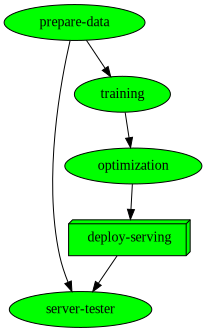

uid,start,state,name,parameters,results
...000798c5,Feb 14 15:48:21,completed,server_tester,label_column=labelsendpoint=http://huggingface-demo-serving-huggingface-demo.default-tenant.app.cto-office.iguazio-cd1.com/,count=100error_count=0avg_latency=64292min_latency=13617max_latency=103084
...cf462a8a,Feb 14 15:44:11,completed,optimization,model_path=store://artifacts/huggingface-demo/trained_model:66826303-e1ad-4a8d-a123-923ae26ae97b,
...6579d970,Feb 14 15:35:15,completed,training,pretrained_tokenizer=distilbert-base-uncasedpretrained_model=distilbert-base-uncased,loss=0.0409learning_rate=0.0eval_loss=0.1591210961341858eval_accuracy=0.9433333333333334eval_f1=0.8440366972477065eval_runtime=12.4198eval_samples_per_second=24.155eval_steps_per_second=1.53train_runtime=483.4091train_samples_per_second=6.206train_steps_per_second=0.389total_flos=34259380977408.0
...0e756715,Feb 14 15:34:49,completed,prepare_data,dataset_name=Shayanvsf/US_Airline_Sentiment,


In [3]:
workflow_run = project.run(
    name=workflow_name,
    arguments={
        "dataset_name": "Shayanvsf/US_Airline_Sentiment",
        "pretrained_tokenizer": "distilbert-base-uncased",
        "pretrained_model": "distilbert-base-uncased",
    },
    watch=True,
    dirty=True
)

Here we can see how the workflow looks on our UI & Also the result of the trainer and the server_tester

<img src="./images/workflow.png" alt="workflow" width="1200"/>

<img src="./images/latancy.png" alt="latancy" width="1200"/>

In [2]:
serving_function = project.get_function("serving")

In [3]:
body = "i love flying"
response = serving_function.invoke(path='/predict', body=body)
print(response)

> 2023-02-14 15:55:36,832 [info] invoking function: {'method': 'POST', 'path': 'http://nuclio-huggingface-demo-serving.default-tenant.svc.cluster.local:8080/predict'}
['The sentiment is POSITIVE', 'The prediction score is 0.4955597519874573']


### Gradio front-end

Gradio is a friendly web interface that we demonstrate here how to use easily for submitting predictions to our real-time pipeline and to get the results as well!

For more information, please see [gradio page](https://gradio.app/)

In [4]:
from src.gradio_front import build_and_launch

build_and_launch(serving_func=serving_function)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://1b9b9e54-7af1-4576.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


> 2023-02-14 15:55:59,975 [info] invoking function: {'method': 'POST', 'path': 'http://nuclio-huggingface-demo-serving.default-tenant.svc.cluster.local:8080/predict'}
